# 종속변수와 상관성이 있는 변수

'지하철역수' - '문화시설수'

## #01. 패키지

In [1]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 군집을 위한 패키지
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [4]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드수정,읍면동명,생성일자,말소일자,지하철역수,의료기관수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,NaN,NaN,11.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,NaN,2.0,75.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,NaN,NaN,11.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,NaN,NaN,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,NaN,NaN,15.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


## #03. 데이터 살펴보기

In [5]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드수정', '읍면동명', '생성일자', '말소일자',
       '지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'],
      dtype='object')

In [6]:
tmp = origin.filter(['읍면동명', '문화시설수', '지하철역수'])
tmp.head()

,읍면동명,문화시설수,지하철역수
0,청운효자동,6.0,NaN
1,사직동,13.0,2.0
2,삼청동,31.0,NaN
3,부암동,5.0,NaN
4,평창동,11.0,NaN


In [7]:
tmp.isna().sum()

읍면동명       0
문화시설수    182
지하철역수    222
dtype: int64

> 행정동별로 지하철역과 문화시설이 없는 곳도 존재하고 서울시의 조사를 통한 데이터임을 감안해 결측치를 0으로 설정

In [8]:
tmp = tmp.fillna(0)
tmp.isna().sum()

읍면동명     0
문화시설수    0
지하철역수    0
dtype: int64

### 산점도 그래프

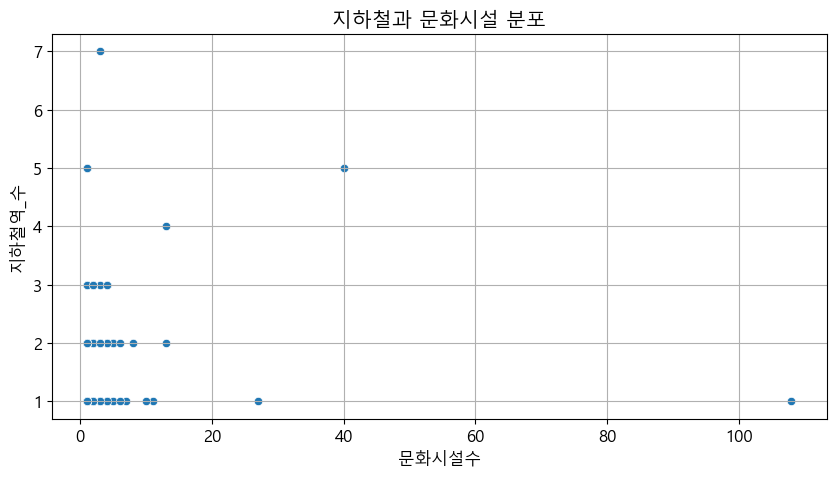

In [9]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='문화시설수', y = '지하철역수')
plt.title("지하철과 문화시설 분포")
plt.xlabel('문화시설수')
plt.ylabel("지하철역_수")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [10]:
# X = origin[['사업체_수', '지하철역수']].values
# X = origin.iloc[:, [origin.columns.get_loc('사업체_수'), origin.columns.get_loc('지하철역수')]].values

X = tmp.iloc[:,[1,2]].values
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 은행 수)

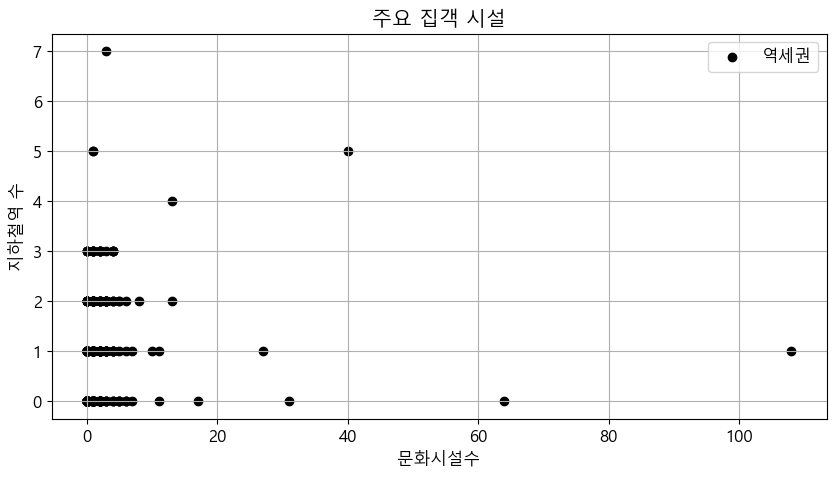

In [11]:
plt.scatter(X[:,0], X[:,1], c='black', label='역세권')
plt.xlabel('문화시설수')
plt.ylabel('지하철역 수')
plt.legend()
plt.title('주요 집객 시설')
plt.grid()
plt.show()
plt.close()

### k값 결정

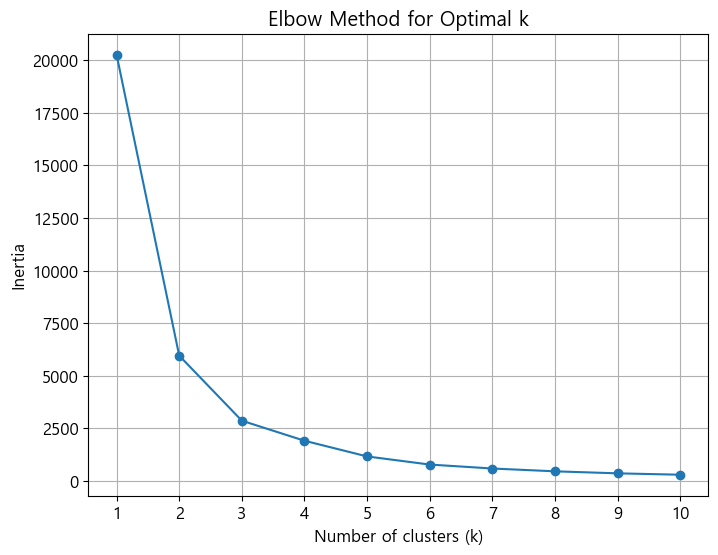

In [12]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)  # 그리드 추가

# X 축의 눈금을 1 간격으로 설정
plt.xticks(range(1, 11, 1))
plt.show()
plt.close()

> 4이후로 감소폭이 크지 않으므로 k=3~5로 결정

## #05. K-means clustering

In [13]:
kmeans = KMeans(n_clusters=4).fit(X)
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,문화시설수,지하철역수,클러스터_수치
0,청운효자동,6.0,0.0,3
1,사직동,13.0,2.0,3
2,삼청동,31.0,0.0,2
3,부암동,5.0,0.0,3
4,평창동,11.0,0.0,3
...,...,...,...,...
421,성내제2동,2.0,3.0,0
422,성내제3동,1.0,1.0,0
423,길동,1.0,1.0,0
424,둔촌제1동,0.0,1.0,0


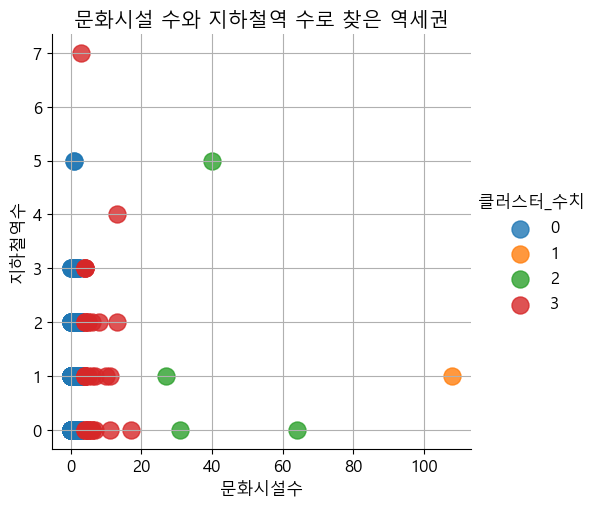

In [14]:
sb.lmplot(x='문화시설수', y='지하철역수', data=tmp, fit_reg=False, scatter_kws={"s": 150}, hue="클러스터_수치")
plt.title("문화시설 수와 지하철역 수로 찾은 역세권")
plt.grid()

In [15]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,문화시설수,지하철역수,클러스터_수치
5,무악동,0.0,0.0,0
6,교남동,1.0,0.0,0
9,종로5.6가동,3.0,2.0,0
12,창신제1동,1.0,1.0,0
13,창신제2동,0.0,1.0,0
...,...,...,...,...
421,성내제2동,2.0,3.0,0
422,성내제3동,1.0,1.0,0
423,길동,1.0,1.0,0
424,둔촌제1동,0.0,1.0,0


In [16]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,문화시설수,지하철역수,클러스터_수치
10,이화동,108.0,1.0,1


In [17]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,문화시설수,지하철역수,클러스터_수치
2,삼청동,31.0,0.0,2
8,종로1.2.3.4가동,40.0,5.0,2
11,혜화동,64.0,0.0,2
362,청담동,27.0,1.0,2


In [18]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,문화시설수,지하철역수,클러스터_수치
0,청운효자동,6.0,0.0,3
1,사직동,13.0,2.0,3
3,부암동,5.0,0.0,3
4,평창동,11.0,0.0,3
7,가회동,6.0,0.0,3
17,소공동,11.0,1.0,3
19,명동,7.0,1.0,3
21,장충동,4.0,1.0,3
24,신당동,4.0,3.0,3
34,남영동,4.0,3.0,3


In [19]:
tmp[tmp['클러스터_수치']==4]

,읍면동명,문화시설수,지하철역수,클러스터_수치
